# Chapter 5, Example 1a
## Random sampling for 10 experiments

In [1]:
import torch
from torch import nn

from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

In [2]:
lr = 0.1
no_epochs = 1000

no_labels = 3
no_features = 4
hidden_units = 5

no_exps = 10

seed = 100
torch.manual_seed(seed)
np.random.seed(seed)

In [3]:
no_inputs = 4
no_outputs = 3

# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

no_data = len(iris.data)

X = iris.data

# convert the targets into one-hot matrix
Y = np.zeros((no_data, no_outputs))
for i in range(no_data):
    Y[i, iris.target[i]] = 1
    
print(np.shape(X))
print(np.shape(Y))

(150, 4)
(150, 3)


In [4]:
class FFN(nn.Module):
    def __init__(self, no_features, hidden_units, no_labels):
        super().__init__()
        self.relu_stack = nn.Sequential(
            nn.Linear(no_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, no_labels),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.relu_stack(x)
        return logits
    

In [5]:
acc = []
idx = np.arange(no_data)
for exp in range(no_exps):

    np.random.shuffle(idx)
    XX, YY = X[idx], Y[idx]
    x_train, y_train, x_test, y_test = XX[:100], YY[:100], XX[100:], YY[100:]

    model = FFN(no_features, hidden_units, no_labels)
    
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(no_epochs):
        pred = model(torch.tensor(x_train, dtype=torch.float))
        loss = loss_fn(pred, torch.tensor(y_train, dtype=torch.float))
    
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    pred = model(torch.tensor(x_test, dtype=torch.float))
    acc_ = (pred.argmax(1) == torch.tensor(y_test, dtype=torch.float).argmax(1)).type(torch.float).mean()
    
    acc.append(acc_.item())
    
    print('exp %d test accuracy %g'%(exp, acc[exp]))
    
print('* mean accuracy = %g *'% np.mean(acc))

exp 0 test accuracy 1
exp 1 test accuracy 1
exp 2 test accuracy 0.96
exp 3 test accuracy 0.92
exp 4 test accuracy 1
exp 5 test accuracy 0.98
exp 6 test accuracy 0.96
exp 7 test accuracy 0.98
exp 8 test accuracy 0.94
exp 9 test accuracy 1
* mean accuracy = 0.974 *


Text(0, 0.5, 'test accuracy')

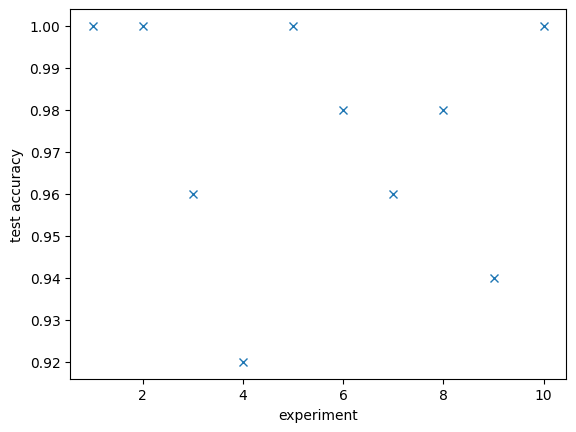

In [6]:
plt.figure(1)
plt.plot(np.arange(no_exps)+1, acc, marker = 'x', linestyle = 'None')
plt.xticks([2, 4, 6, 8, 10])
plt.xlabel('experiment')
plt.ylabel('test accuracy')